# Tecnicas Iterativas en Algebra Matricial

$\newcommand{\bmx}{\large \boldsymbol{x} \normalsize}$
$\newcommand{\bmc}{\large \boldsymbol{c} \normalsize}$
$\newcommand{\bmy}{\large \boldsymbol{y} \normalsize}$
$\newcommand{\bmb}{\large \boldsymbol{b} \normalsize}$


## Notas de notacion
* Vectores negrilla italica. Ej $\bmx$
* Matrices mayuscular italica . Ej $A$
* Escalares son letras minusuclas o griegas $x$

Simbolos especiales de la notacion. Logaritmos y trignometricas en romano $\log x$, $\exp(x)$, $\sin x$, $\mathrm{e}$ (Euler)



# 1.1 Introduccion:
Las ecuaciones diferenciales parciales PDE estan en todas partes:
* fisica
* quimica
* bilogia
* computacion
* economia
* etc.

Sin embargo el 99.999999 y muchas mas nueves por ciento de las ecuaciones PDE no se pueden resolver analiticamente.

Usamos Python (Jupyter) para esta clase.

Programa

* Sistemas iterativos lineales (matrices)
* PDE : Partial Differential Equations. Soluciones numericas
  * Ecuacion de calor (parabolica)
  * Ecuacion de onda (hiperbolica)
  * Poisson (eliptica)



El problema central del AL (Algebra Lineal) es la solucion de

$$ A \bmx  = \bmb$$
donde $A$ es una matriz



El problema es que $A$ en la practica son matrices muy grandes (millones de filas y columnas) y llenas de ceros (sparse matrices) en espanhol son **matrices dispersas**
Los metodos tradicionales (Eliminacion Gaussiana) son muy lentos, ineficientes y aca los metodos iterativos (este capitulo) son mucho mas eficientes y no requieren de almacenar estas matrices gigantescas.

Vamos a ver que la solucion de $A \bmx = \bmb$ se puede obtener de forma recursiva.

El sistema que nos interesa resolver es:

$$ \bmx_i  = T \bmx_{i-1} + \bmc. \tag{1.1}$$


Desenrollemos
Comenzando con una solucion inicial (guess) $\bmx_0$

\begin{eqnarray}
  \bmx_1 &=& T \bmx_0 + \bmc \\
  \bmx_2 &=& T \bmx_1 + \bmc \\
  &\vdots& \\
  \bmx_n &=& T \bmx_{n-1} + \bmc
\end{eqnarray}


Hay varios asuntos que nos atanen en este momento.

* Convergencia. El sistema converge? es decir, hay una solucion **finita**. Bajo que condiciones convere el sistema
* Rapidez en la convergencia. Es decir cuantas iteraciones se necitan para que el error este debajo de un umbral











## 1.1.1 Conceptos basicos del Alebra Lineal

Etudiamos dos cosas

* norma
* distancia


La **norma** esta relacionada al tamanho de un objeto.

Por ejemplo en $\mathbb{R}^2$ definimos la distancia entre dos puntos como

$$d[ (x_1, x_2), (y_1, y_2)] = \sqrt{ (x_1 - y_1)^2 + (x_2-y_2)^2 } .$$
A esta distancia se le conoce como **Euclidiana** o **Pitagorica** .

En general, podemos extender esta definicion a $\mathbb{R}^n$
como

$$ d[ (x_1, x_2, \cdots, x_n), (y_1, y_2, \cdots, y_n) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2} .$$

Podemos definir la distancia una vez conozcamos la definicion de **norma**. La distancia va a ser la norma de la diferencia de dos puntos.

La siguiente definicion es **axiomatica**. Es decir que se define un objeto por sus propiedades (axiomas).
Defincion 1.1.1 norma de un vector

La norma de un vector $\| \bmx \|$ se define axiomaticamente como

1. $\| \bmx \| \ge 0 $ y $\| \bmx \| = 0$ si y solo si $\bmx = 0$.

2. $\| \alpha \bmx \| = | \alpha | \| \bmx \|. $ (homogenidad)

3. $\| \bmx + \bmy \| \le \| \bmx \| + \| \bmy \| $ (desigualdad triangular)


En $\mathbb{R}^n$ hay muchas cosas que se ajustan a esta definicion. Vamos a ver algunos ejemplos.


* La norma $p$ o $\ell_p$:

  $\ell_p = \| \bmx \|_p = \left ( \sum_{i=1}^n | x_i |^p   \right )^{1/p} \quad , \quad p \ge 1$



Veamos algunos ejemplos

  1. $p=1$,

  $$ \ell_1(\bmx) = \| \bmx \|_1 = \sum_{i=1}^n  | x_i | .$$

  2. $p=2$, (pitagorica o Euclidiana)

  $$ \ell_2(\bmx) = \| \bmx \|_2 = \sqrt{\sum_{i=1}^n  | x_i |^2} .$$

  3. $p=\infty$. Tambien llamada norma del maximo


  $$\ell_{\infty} = \| \bmx \|_{\infty} = \max | x_i | .$$

  Dejamos como ejercicio probar que

  $$\lim_{p \infty} \ell_p = \ell_{\infty} .$$

  Definimos la **distancia** inducida  por una norma.

  $$d(x,y) = \ell_p (\bmx - \bmy) = \left ( \sum_{i=1}^n | x_i - y_i |^p
    \right )^{1/p} .$$


Tambien podemos definir la norma de una matriz. Pero ademas de los axiomas de arriba queremos $\| A B \| \le \| A \| \| B \|$.

Como definimos la norma de una matriz? Aparte de la forma axiomatica de arriba podemos encontrar algunas definiciones
[interesantes](https://en.wikipedia.org/wiki/Matrix_norm).

Para esto definamos el **sup** (supremo).\

El supremo es el mas pequenho de las cotas superioes (una cota es lo que esta por encima del conjunto).

Ejemplo $S=(1,5)$ el $5$ es el supremo. No el maximo. El intervalo (conjunta) tiene un supremo que es 5, pero no existe el maximo. $S=[1,5]$, el $5$ es maximo y supremo a la vez.

La definicion formal es que el supremo tiene dos propiedades.
Al supremos lo llamamos $y$
1. Es cota superior. Es decir que $\forall x \in A$, $y \ge x$
1. $\forall \epsilon$ existe un $x_0$ in $A$, tal que $y-x \le x_0$.


### Normas de matrices inducidas por normas de vectores.

Sea $A$ una matrriz

$$\| A \| = \sum \{ \| A \bmx \| : \| \bmx \| = 1  \} = \sup \left \{  \frac{ \| A \bmx \|}{\| \bmx \| }: \| \bmx \| \ne 0 \right \} .$$

Esta definicion se ajusta a los axiomas pero no es el proposito de esta clase probar esto (esto es de un curso de analisis funcional).

Vamos a ver algunas normas de matrices, especificas, mas simples que usamos durante el curso.

2. La norma $p$.
  $p=1$.

  $$ \| A \|_1 = \max_{1 \le j \le n} \sum_{i=1}^n| a_{ij} | .$$
  En palablras. Es el maximo de la sumas de los valores abolutos por columnas

3. $p=2$.

$$\| A \|_2 = \sigma_{\max}(A) .$$

Donde $\sigma$ representa los valores singulares de la matriz. Es decir las raicies cuadradas los autovalores de la matriz $A^T A$.

El concepto de **autovalor** lo explico en unos momentos

4. $p=\infty$.

$$\| A \|_{\infty} = \max_{1 \le i \le n} \sum_{j=1}^n | a_{ij} | .$$

Maximo por filas.


5. La norma de Frobenious


$$ \| A \|_F  =  \sqrt{ \sum_{i=1}^n \sum_{j=1}^n | a_{ij}|}.$$


### Autovalores/Autovectores (EigenValues/EigenVectors)
Todas las matrices en este curso se asumen cuadradas, a no ser
que se indique lo contrario.

Asuma una matriz $A$ (cuadrada), si existe un escalar $\lambda$
y un vector $\bmx$ tal que

$$A \bmx = \lambda \bmx .$$
decimos que $\lambda$ es una autovalor de $A$ y que $\bmx$ es una autovector de $A$.  Es importante decir que $\bmx \ne 0$.



[Wikipedia](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) presenta un analisis exhaustivo del concepto con graficas bien ilustradas.

Los autovalores/autovectores se aplican en

* la mecanica cuantica
* la elasticidad
* la mecanica analitica
* los metodos numericos (este curso)
* el disenho grafico.

#### Como se encuentran los autovalores/vectores?

La idea es la siguiente, de $A \bmx = \lambda \bmx $
tenemos que


$I$ la matriz identidad $I \bmx = \bmx $
\begin{eqnarray}
A \bmx &=& \lambda \bmx \\
A \bmx &=& \lambda I \bmx \\
(A - \lambda I) \bmx &=& 0
\end{eqnarray}
Si $\bmx \ne 0$

Es decir $\det ( A - \lambda I) = 0$.

De forma que el algoritmo para encontrar los autovalores/vectores
es

$$ p(\lambda) =  \det ( A - \lambda I)  = 0 .$$
Esto es un polinomio y a este polinomio se le llama el
**polinomio caracteristico**.

### Definicion 1.1.3 Matrices positiva definida/negativ definida.

Una matriz simetrica $A$ es positiva definida si para todo
$\bmx \in \mathbb{R}^n$, $\bmx^T A \bmx >0$
Una matriz simetrica $A$ es negativa definida si para todo
$\bmx \in \mathbb{R}^n$, $\bmx^T A \bmx < 0$.

Esto funciona tanto para reales como para complejos.
Se puede probar, y esto queda de tarea que si $A$ es positiva definida entonces todos los autovalores de $A$ son positivos y que si $A$ es negativa definida, todos los autovalores de $A$ son negativos.


### Definicion 1.1.4. Matix diagonal estricamente dominante.
La matriz $A$ es **estrictamente dominante por filas** si
$$ | a_{ii} | > \sum_{\substack{j=1 \\ j \ne i}} | a_{ij} | .$$

Ejemplo explicado en el tablero.

La matriz $A$ es **estrictamente dominante por columnas** si
$$ | a_{jj} | > \sum_{\substack{i=1 \\ i \ne i}} | a_{ij} | .$$

La palabra **estrictamente** se puede quitar y cambiar $>$ por $\ge$.


### Definicion 1.1.5 (Matriz convergente)
La matriz $A$ es convergente si

$$\lim_{n \to \infty} A^n = 0 .$$

### DEfinicion 1.1.6 Radio Espectral

El valor

$$\rho(A) = \max | \lambda | \quad , \quad \lambda \quad \text{es autovalor de} \quad A .$$

### Teorema 1.1.1
La matriz $A$ es convergente si y solo si $\rho(A) < 1$.

Asumamos que $\rho(A) < 1$, elevemos $A^k$
En el apendice B.9 mostramos

$$A^k = Q J^k Q^{-1} .$$

Ahora $Q$ es una matriz finita, y no cambia con $k$
y $J^k \to 0$ cuando $k \to \infty$ si todos los autovalres de $A$ son menores que 1.

Es decir si $\rho(A) < 1$ , $A$ converge.

Si $A$ converge entonces  $\lim_{k \to \infty} A^k = 0$
Sea $\bmx$ un autovector de $A$ con autovalor $\lambda$.

$$ A \bmx = \lambda \bmx .$$
$$ A A \bmx = \lambda  A \bmx = \lambda^2 \bmx .$$

En general

$$A^k \bmx = \lambda^k \bmx  \tag{1} .$$

Entonces como $\lim_{k \to \infty} A^k = 0$
tomando el limite en (1)

$$ \lim_{k \to \infty} \lambda^k \bmx = 0.$$
como $x$ no cambia con $k$ entonces $\lim_{k \to \infty} |\lambda|^k = 0$
O sea que $\lambda  < 1$.  Y entonces $\rho(A) < 1$lim_.


### Teorema 1.1.2: Para una matriz $A$ (cuadrada)

$$\rho(A) \le \| A \| .$$

Prueba: Asuma que $\bmx \ne 0$, y $A \bmx = \lambda \bmx$
entonces de la definicion de norma

$$ \| A \bmx \| \le \| A \| \| \bmx \| .$$
De otro lado $ \| \lambda \bmx \| = | \lambda | \| \bmx \|$
o sea que


$$ | \lambda | \| \bmx \| \le \| A \| \| x \|  .$$
podemos dividir por $ \| x \|$, y

$$  | \lambda | \le \| A \|.$$
y esto es para **todos** los $\lambda$s de forma


$$ \rho(A) \le \| A \| .$$

El radio espectral de $A$ es menor que su normal.


### Teorema 1.1.3: La matria $A$ es invertible si y solo si $\lambda = 0$ no es autovalor de $A$.

Sabemos que $A \bmx = 0$ para $\bmx \ne 0$, significa que $A$ no es invertible,por que sino, multiplicamos a ambos lados por $A^{-1}$ y encontramos que $\bmx = 0$. Que $\bmx \ne 0$ es equivalente a $A \bmx = 0$ es lo mismo que
$A \bmx = \lambda \bmx$, con $\lambda=0$, lo cual quiere decir que $A$ tiene un autovalor $\lambda = 0$.

### Definicion 1.1.7: El circulo de **Gershgorin**:
Para una matriz $\mathbb{C}^{n \times n}$ con componentes $a_{ij}$ definimos el radio $R=\sum_{j \ne i} | a_{ij} |$ (por filas)
y el centro $a_{ii}$. El dicso $D(a_{ii}, R_i) \subset \mathbb{C}$
se llama **disco de Gershgorin**.

Ejemplo 1.1.1:
Considere la matrix (en los complejos)


\begin{eqnarray}
A =
\begin{pmatrix}
3 & \mathrm{i} & 1   \\
-1 & 4 + 5 \mathrm{i} & 2 \\
2 & 1 & -1
\end{pmatrix}
\end{eqnarray}

Los centros y radios del los circulos de Gershgorin son:

\begin{eqnarray}
\text{fila 1} \quad : \quad \text{centro} (3, 0) \quad , \quad \text{radio} = | \mathrm{i} | + 1 = 2 \\
\text{fila 2} \quad : \quad \text{centro} (4, 5) \quad , \quad \text{radio} = | -1| + |2| = 3 \\
\text{fila 3} \quad : \quad \text{centro} (-1, 0) \quad , \quad \text{radio} = | 2 |  + |1| = 3 \\
\end{eqnarray}









In [ ]:
import numpy as np
A = np.array( [[3, 1j, 1], [-1, 4+5j, 2], [2,1,-1]])
A

array([[ 3.+0.j,  0.+1.j,  1.+0.j],
       [-1.+0.j,  4.+5.j,  2.+0.j],
       [ 2.+0.j,  1.+0.j, -1.+0.j]])

In [ ]:
np.linalg.eigvals(A)

array([-1.57932923+2.73067748e-01j,  3.46864601-5.33900324e-04j,
        4.11068322+4.72746615e+00j])

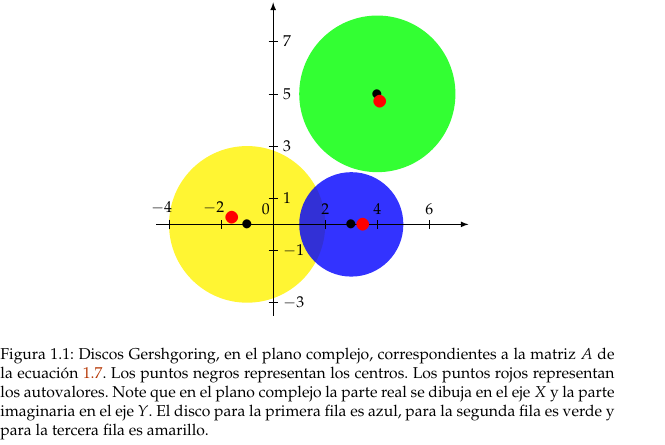

### Teorema 1.1.4 : Todos los autovalores de una matriz $A$ en los complejos, estan contenidos en la unon de los circulos de Gershgorin.

Demostracion: Sea $\lambda$ un autovalor de $A$. Tomemos el autovector correspondiente $\bmx$. Como este autovector no es nulos existe una componente $x_i \ne 0$. Sea $i$ tal que $| x_i | \ge | x_j|$, para $j=1,2, \cdots, n$. El vector

$$ \bmy = \frac{\bmx}{|x_i |} .$$
La components $i$ de $\bmy$ es $y_i=1$ y es la mas grande.

de $A \bmy = \lambda \bmy $
Es decir

$$\sum_j a_{ij} y_j = \lambda y_i = \lambda .$$
Separemos la componente $y_i$ de las demas

$$\sum_{j \ne i} a_{ij} y_j + a_{ii} =  \lambda .$$

$$ | \lambda - a_{ii} | =  \sum_{j \ne i} | a_{ij} |  | y_j | \le \sum_{j \ne i} | a_{ij}| = R_i  .$$

Es decir que $\lambda$ esta en el ciculo de Greshgorin $i$.